In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
stocks=pd.read_csv('data/ALL_DATA.csv')

In [3]:
stocks

,Ticker,Date,Open,High,Low,Close,Volume
0,TGH,2022-12-30,0.600000,0.600000,0.600000,0.600000,146218
1,ADWYA,2022-12-30,5.950000,5.950000,5.950000,5.950000,9422
2,BH,2022-12-30,13.560000,14.000000,13.560000,13.560000,4227
3,SMART,2022-12-30,24.200000,24.200000,23.950000,24.200000,7375
4,PGH,2022-12-30,8.780000,8.780000,8.780000,8.780000,1
...,...,...,...,...,...,...,...
168312,SPDIT,2010-01-04,6.050000,6.200000,6.050000,6.200000,3180
168313,TJL,2010-01-04,23.300000,23.310000,23.300000,23.310000,1143
168314,MNP,2010-01-04,25.235221,25.452766,25.235221,25.289607,2739
168315,ARTES,2010-01-04,8.223726,8.358541,8.223726,8.358541,1851


In [4]:
stocks.shape

(168317, 7)

In [5]:
stocks.isnull().sum()

Ticker     0
Date       0
Open      31
High      33
Low       23
Close     33
Volume     0
dtype: int64

In [10]:
stocks.iloc[2335]

Ticker         BHASS
Date      2022-11-03
Open             NaN
High             NaN
Low             50.0
Close            NaN
Volume            38
Name: 2335, dtype: object

We could impute the null rows buy hey they are so few, gonna just drop them xD

In [11]:
stocks.dropna(inplace=True)

In [24]:
stocks.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,168281.0,15.156818,30.933802,0.12,3.54,7.16,14.40,602.75
High,168281.0,15.252414,31.059811,0.13,3.58,7.21,14.49,602.75
Low,168281.0,15.058650,30.801951,0.12,3.50,7.10,14.30,602.75
Close,168281.0,15.174964,30.944945,0.12,3.55,7.18,14.40,602.75
Volume,168281.0,14424.344430,79254.737982,0.00,424.00,2311.00,9100.00,8264824.00


In [161]:
def describe_col(series):
  print('Min:', series['min'],'; Max:',series['max'],'; Mean:',series['mean'], '; Std:', series['std'])

### Question: most traded stock, in terms of volume ? 
Having largest volume sum

In [14]:
volume_sum=stocks.groupby('Ticker')['Volume'].sum().sort_values(ascending=False)

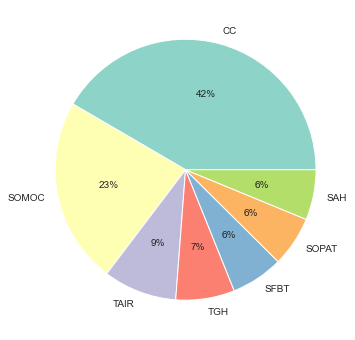

In [15]:
palette_color = sns.color_palette('Set3')
plt.figure(figsize=(8,6))
plt.pie(volume_sum.values[:7],labels=volume_sum.keys()[:7], colors=palette_color, autopct='%.0f%%')
plt.show()

# We'll Analyse Individual Stocks

## **Questions:**
1. When did they do an IPO?
2. What was the change in price over time?
3. What was the moving average?
4. What was the correlation between different stocks?
5. How much value do we put at risk by investing in a particular stock?

### 1) When did Delice and Land'or do an IPO?
* DH = Delice Holding
* LNDOR = LAND'OR

In [126]:
dh_data=pd.read_csv('data/DH.csv')
lndor_data=pd.read_csv('data/LNDOR.csv')

In [127]:
dh_data.index = pd.to_datetime(dh_data.index, format = '%Y-%m-%d')

In [128]:
print("First Delice trade:",dh_data['Date'].min())
print("First Land'or trade:",lndor_data['Date'].min())

First Delice trade: 2014-10-14
First Land'or trade: 2013-03-05


### 2) What was the change in price over time?
**BIAT vs Attijari**

In [131]:
biat_data=pd.read_csv('data/BIAT.csv')
tjari_data=pd.read_csv('data/TJARI.csv')

**Closing Price:**

In [132]:
biat_data.set_index('Date',inplace=True)
tjari_data.set_index('Date',inplace=True)

In [183]:
tjari_data.sort_index(inplace=True)
biat_data.sort_index(inplace=True)

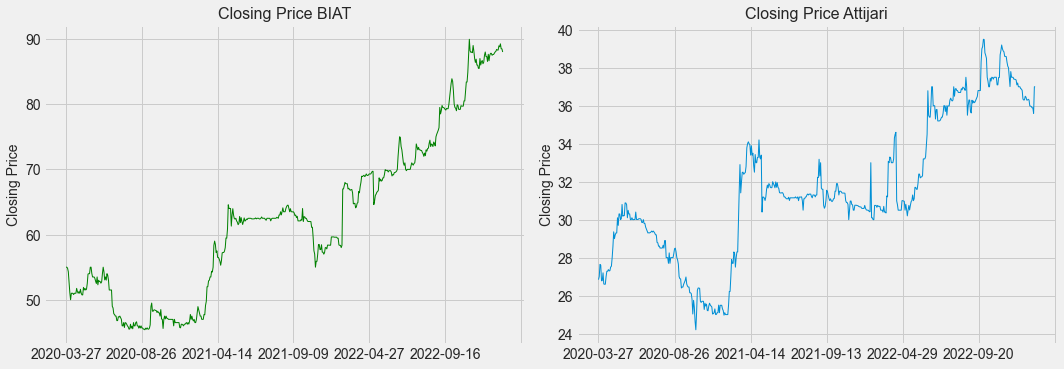

In [184]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
biat_data[biat_data.index>'2020-01-01']['Close'].plot(color='green', linewidth=1)
plt.ylabel('Closing Price', size=14)
plt.xlabel(None)
plt.title(f"Closing Price BIAT", size=16)
plt.subplot(2, 2, 2)
tjari_data[tjari_data.index>'2020-01-01']['Close'].plot(linewidth=1)
plt.ylabel('Closing Price', size=14)
plt.xlabel(None)
plt.title(f"Closing Price Attijari", size=16)
    
plt.tight_layout()
plt.savefig('figures/closing_price_biat_tjari.jpg', dpi=300)

**Volume of Sales:**

Min: 2.0 ; Max: 3372356.0 ; Mean: 5895.927824267783 ; Std: 63861.07303483719


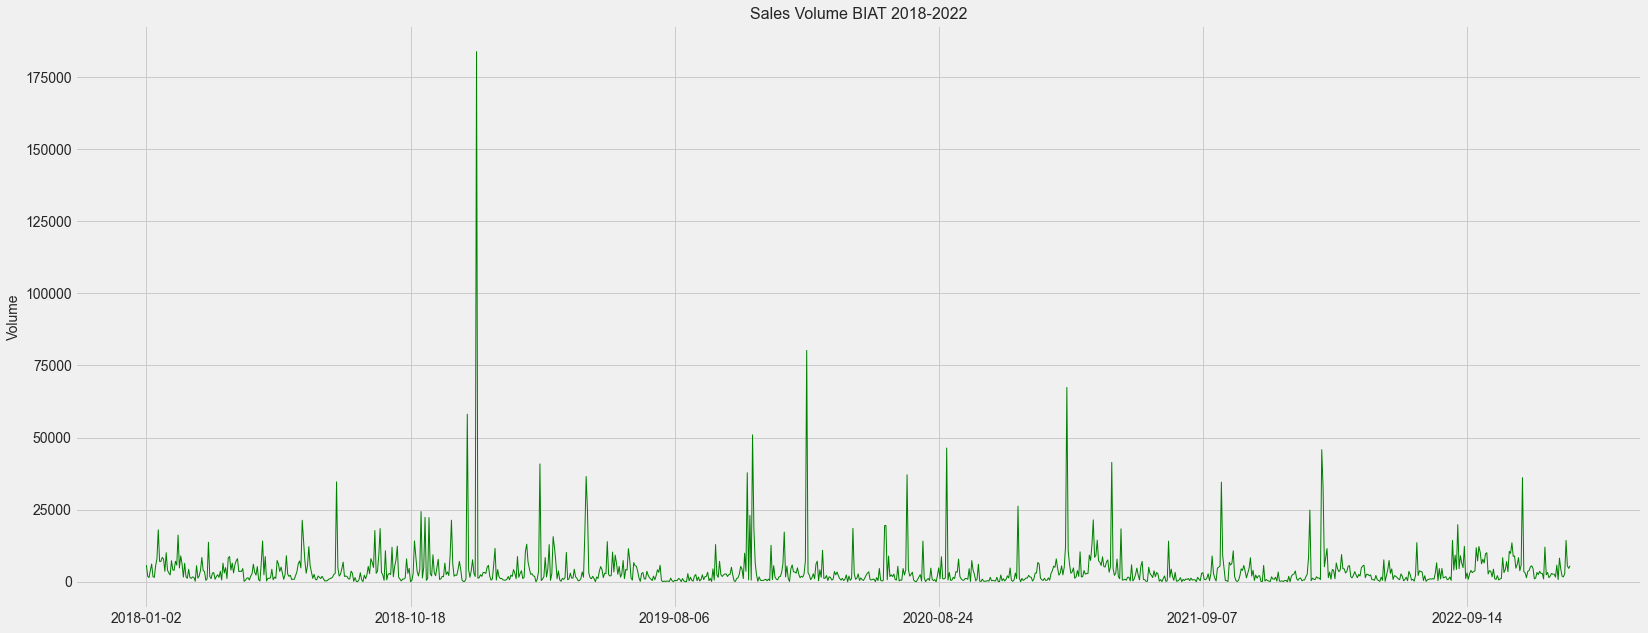

In [185]:
plt.figure(figsize=(25, 10))

biat_data[biat_data.index>'2018-01-01']['Volume'].plot(color='green', linewidth=1)
plt.ylabel('Volume', size=14)
plt.xlabel(None)
plt.title(f"Sales Volume BIAT 2018-2022", size=16)
plt.savefig('figures/sales_volume_biat.jpg', dpi=300)
describe_col(biat_data['Volume'].describe())

Min: 1.0 ; Max: 766412.0 ; Mean: 6728.336085311317 ; Std: 19843.28506444637


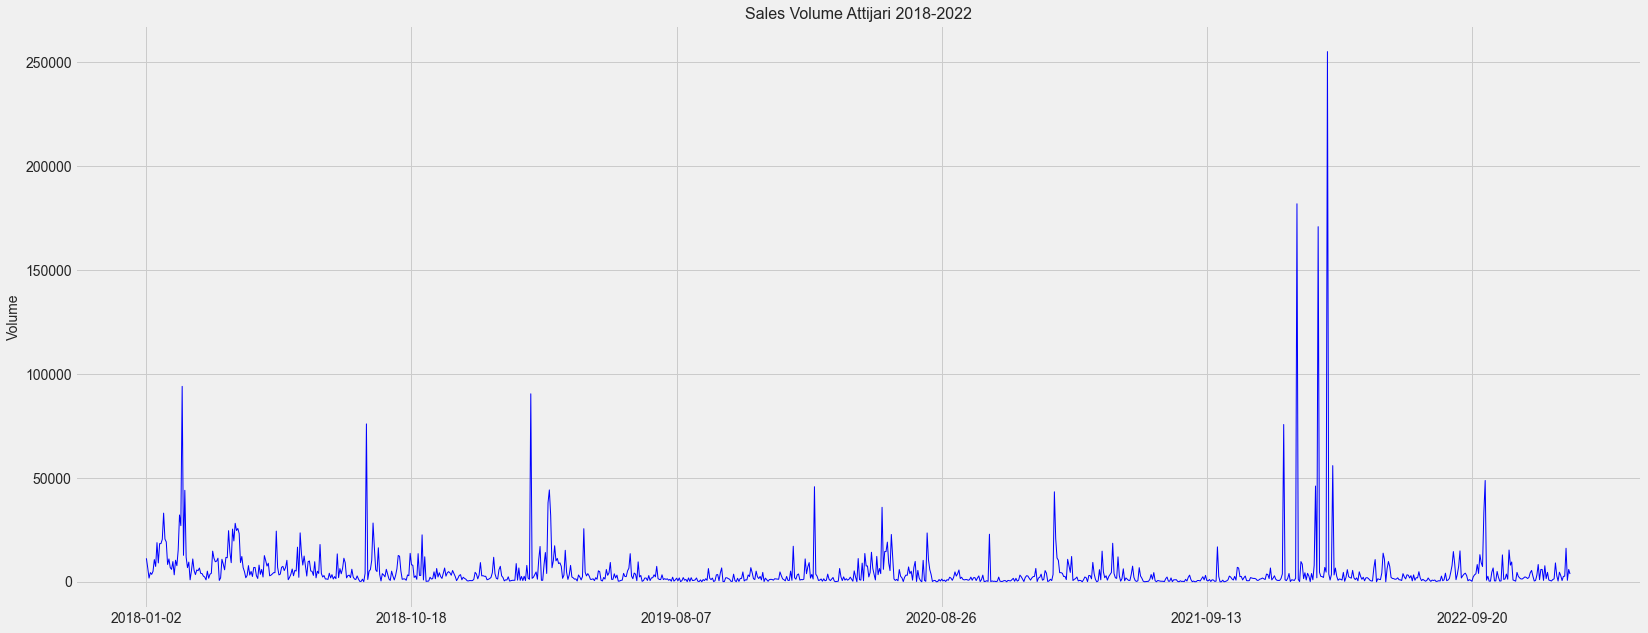

In [186]:
plt.figure(figsize=(25, 10))

tjari_data[tjari_data.index>'2018-01-01']['Volume'].plot(color='blue', linewidth=1)
plt.ylabel('Volume', size=14)
plt.xlabel(None)
plt.title(f"Sales Volume Attijari 2018-2022", size=16)
plt.savefig('figures/sales_volume_tjari.jpg', dpi=300)
describe_col(tjari_data['Volume'].describe())